# <주차수요 예측 프로젝트>

라이브러리 로딩

In [207]:
import pandas as pd

In [208]:
%matplotlib inline
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings(action='ignore')

데이터 불러오기

In [209]:
train = pd.read_csv(r'C:\Users\peter\Desktop\쿠글\train.csv')
test = pd.read_csv(r'C:\Users\peter\Desktop\쿠글\test.csv')

1.EDA

In [210]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

각 feature들의 분포 확인

In [118]:
plt.rcParams["font.family"] = 'Malgun Gothic'
import seaborn as sns

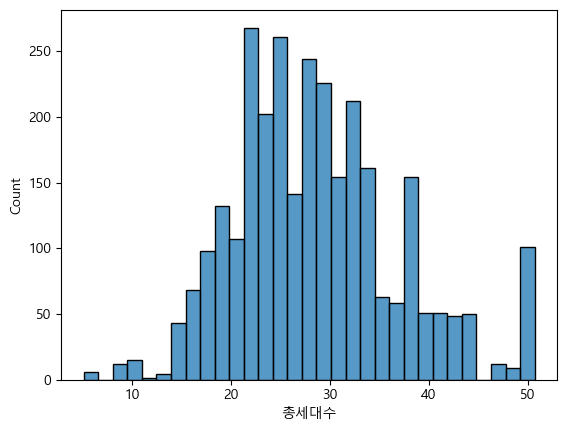

In [119]:
sns.histplot(np.sqrt(train['총세대수']))
plt.show()

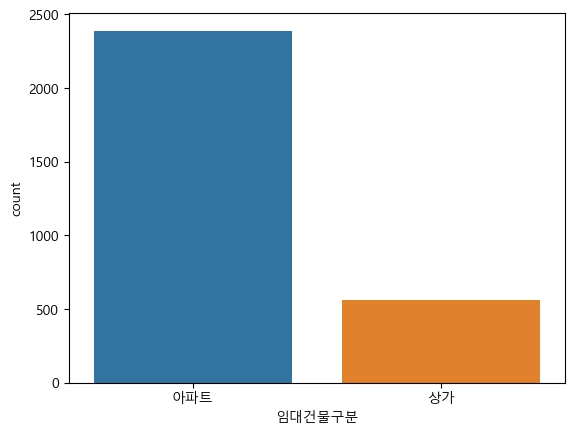

In [120]:
sns.countplot(data=train, x='임대건물구분')
plt.show()

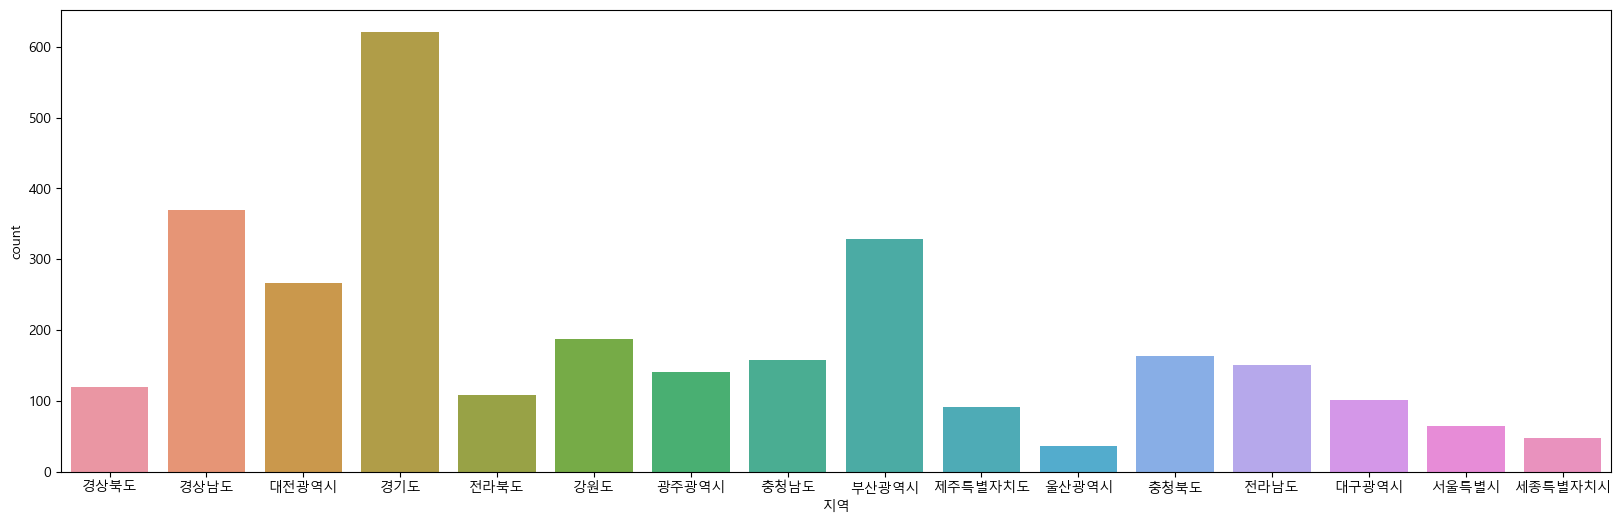

In [121]:
plt.figure(figsize=(20, 6))
sns.countplot(data=train, x='지역')
plt.show()

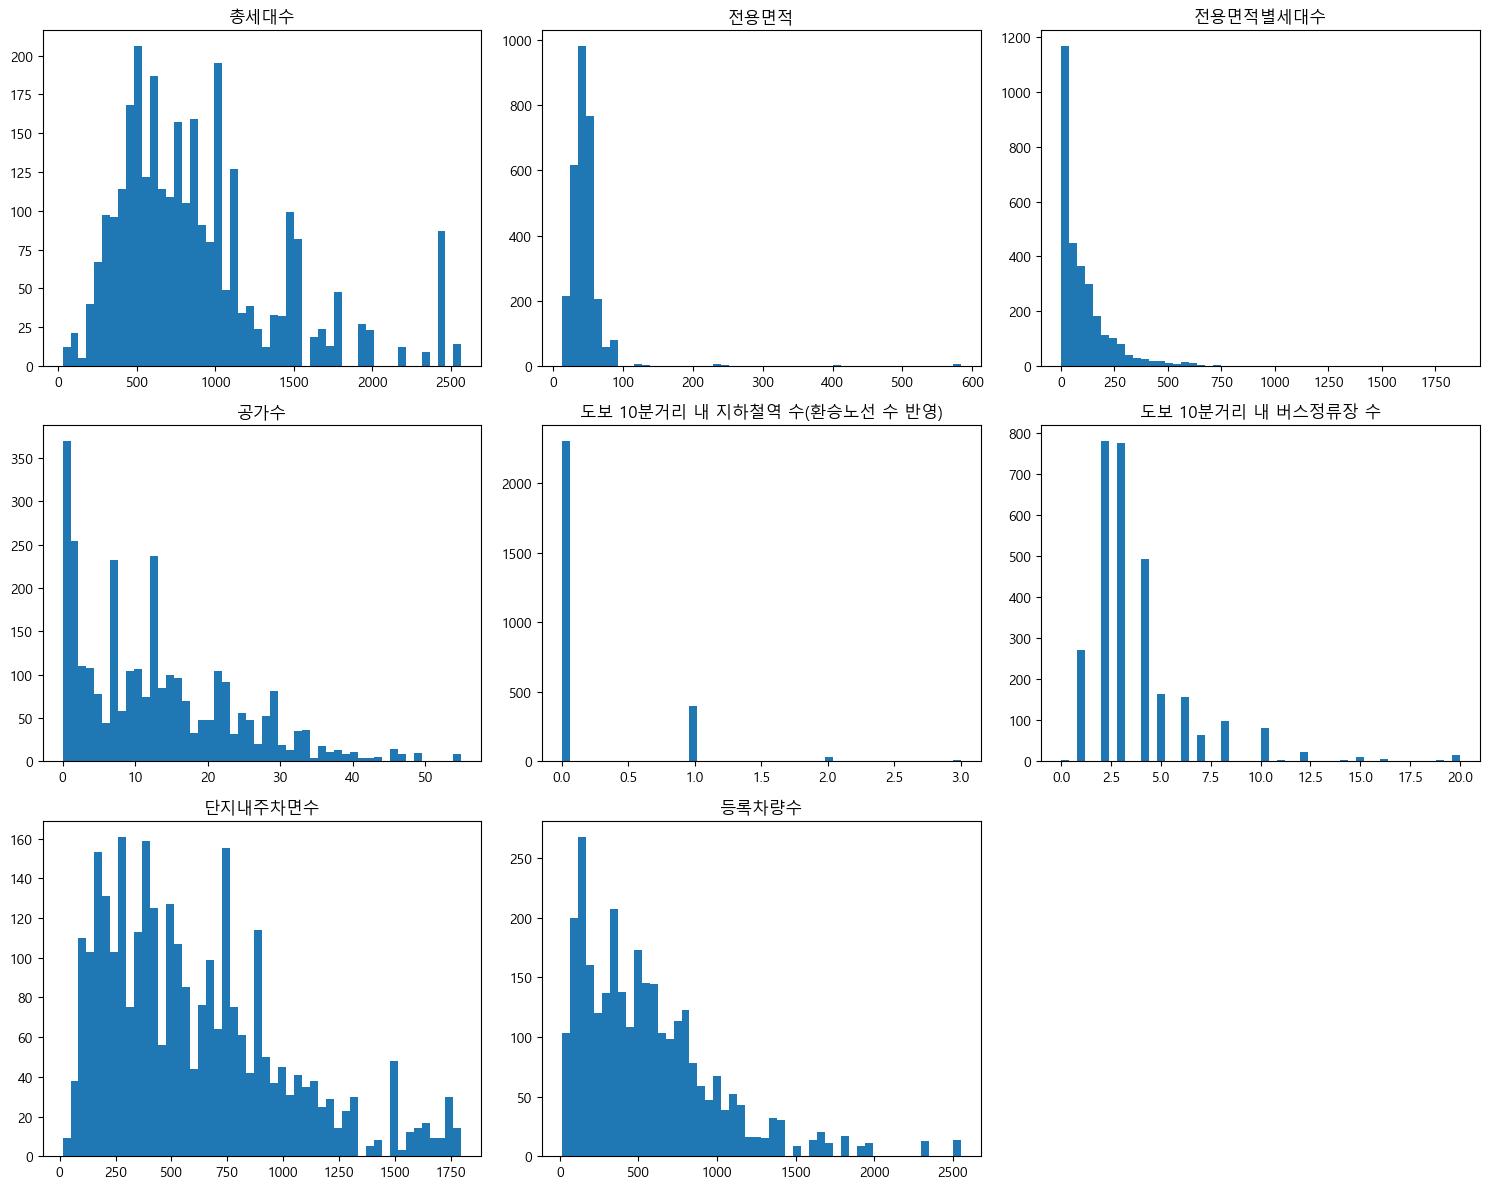

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2952.000000,2952.000000,2952.000000,2952.000000,2741.000000,2948.000000,2952.000000,2952.000000
mean,886.661247,44.757215,102.747967,12.921070,0.176578,3.695726,601.668360,559.768293
std,513.540168,31.874280,132.640159,10.778831,0.427408,2.644665,396.407072,433.375027
min,26.000000,12.620000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000
25%,513.500000,32.100000,14.000000,4.000000,0.000000,2.000000,279.250000,220.000000
50%,779.000000,39.930000,60.000000,11.000000,0.000000,3.000000,517.000000,487.000000
75%,1106.000000,51.562500,144.000000,20.000000,0.000000,4.000000,823.000000,770.000000
max,2568.000000,583.400000,1865.000000,55.000000,3.000000,20.000000,1798.000000,2550.000000


In [122]:
# EDA for each variable

# Displaying basic statistics
basic_statistics = train.describe()

# Plotting histograms for numeric columns
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
train[numeric_cols].hist(figsize=(15, 12), bins=50, grid=False)

plt.tight_layout()
plt.show()

basic_statistics

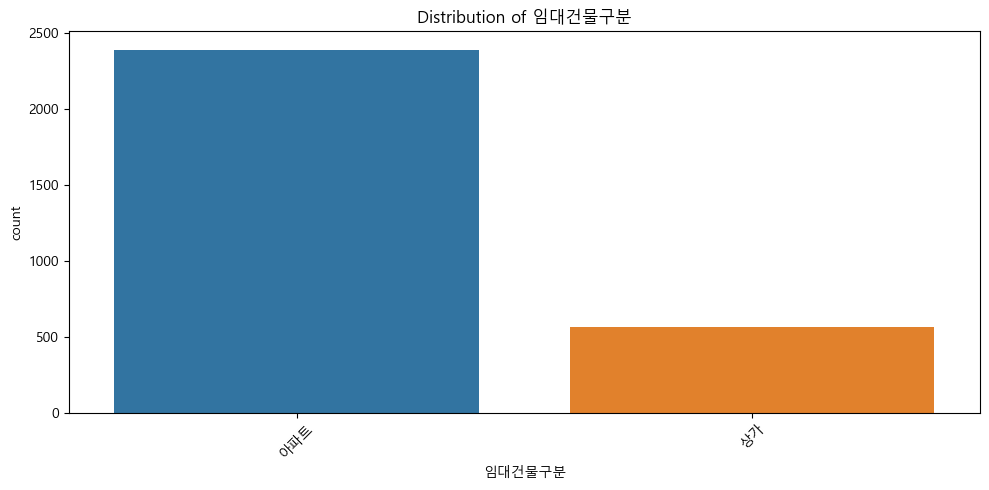

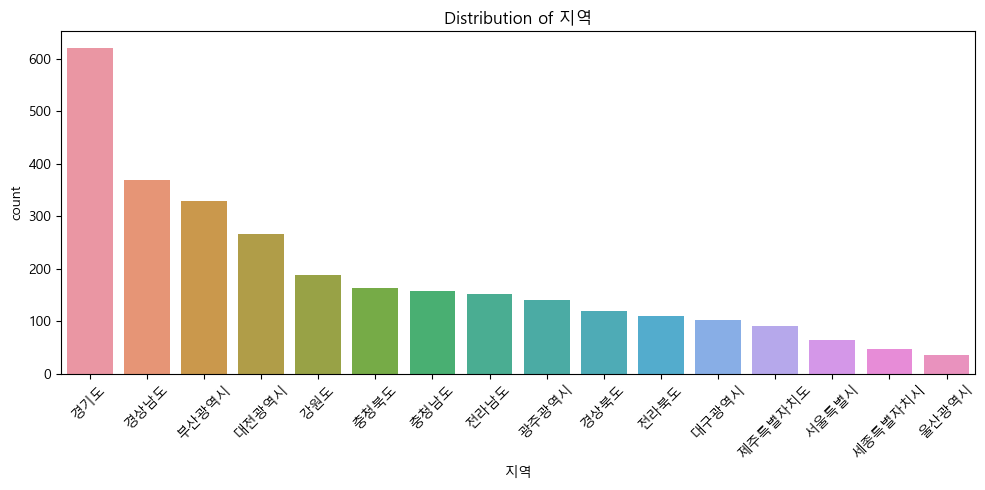

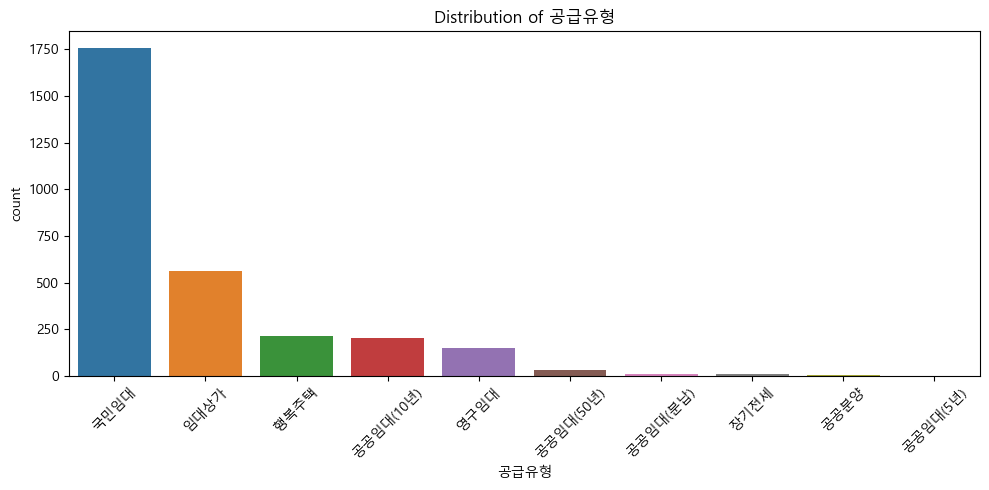

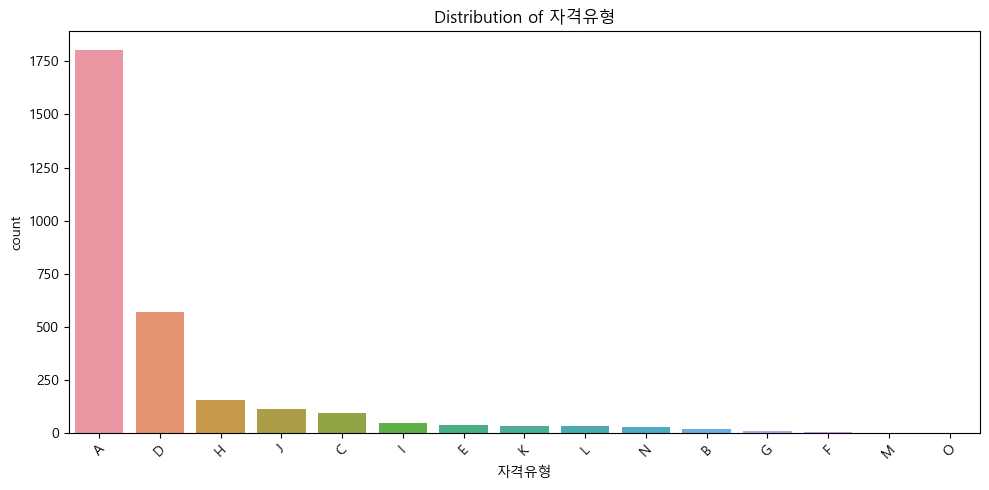

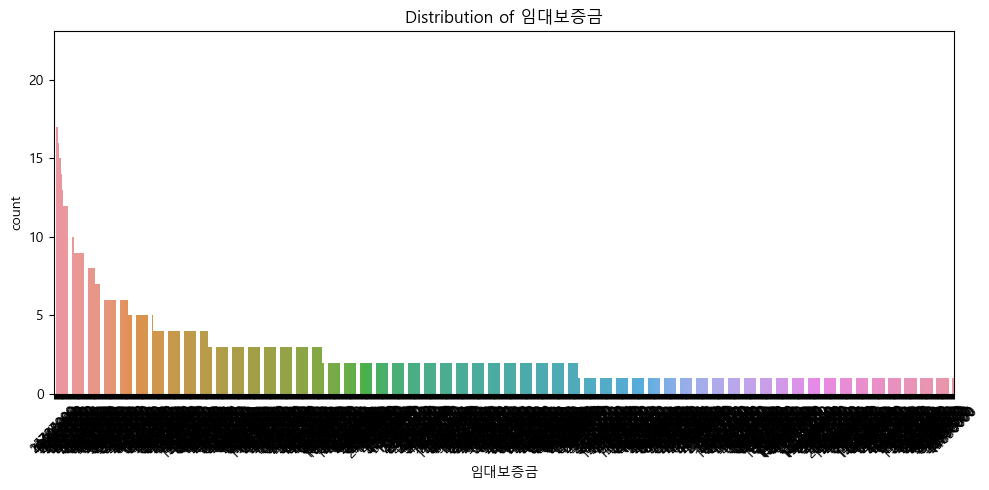

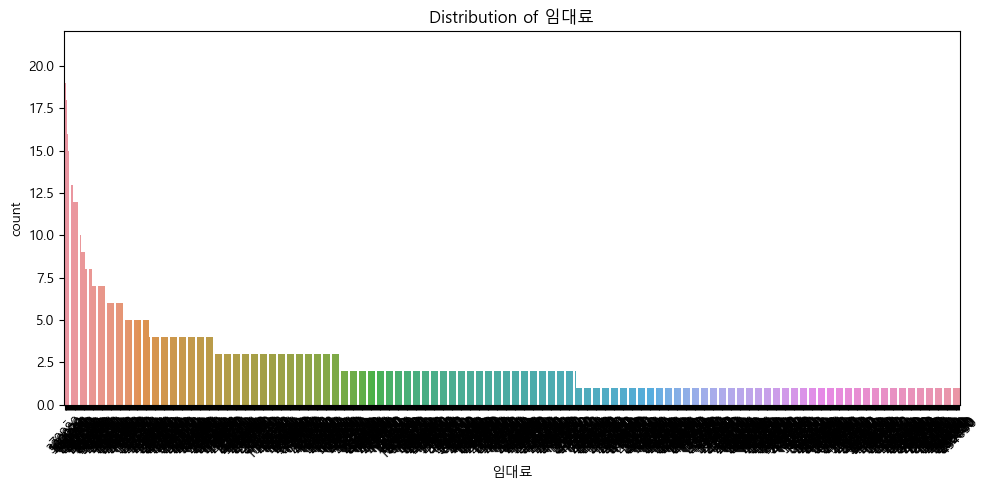

In [124]:
# Plotting bar plots for categorical columns
categorical_cols = train.select_dtypes(include=['object']).columns.drop('단지코드')

# Plotting
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

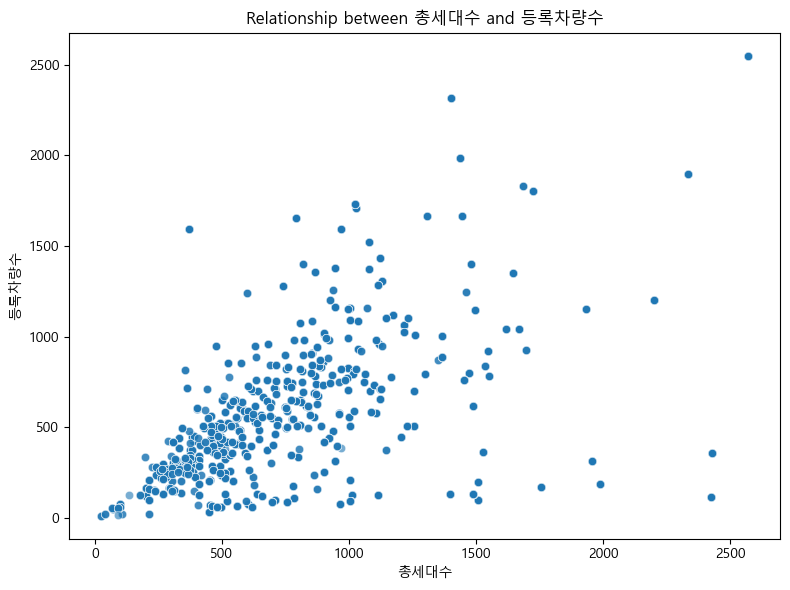

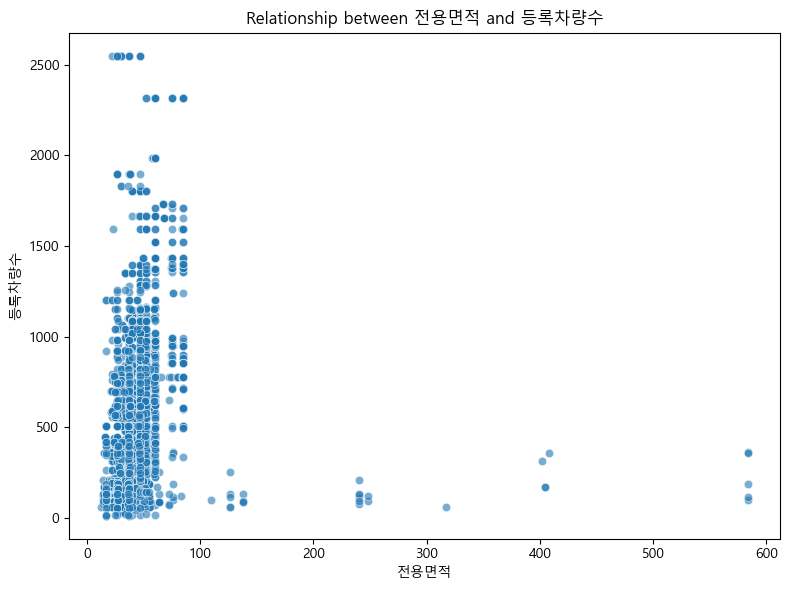

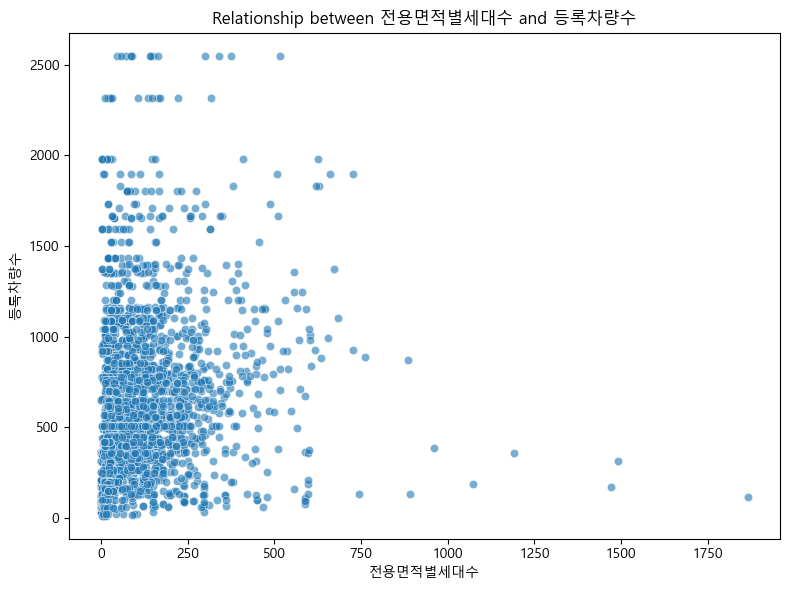

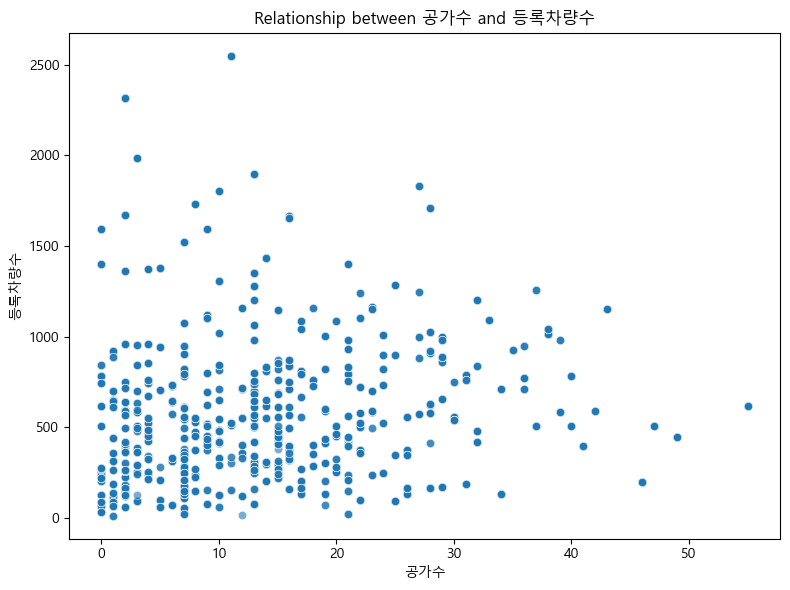

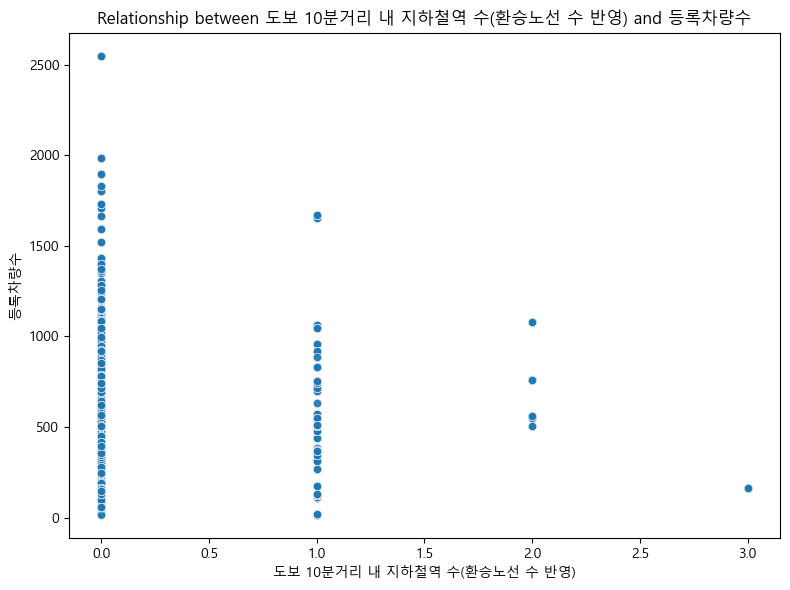

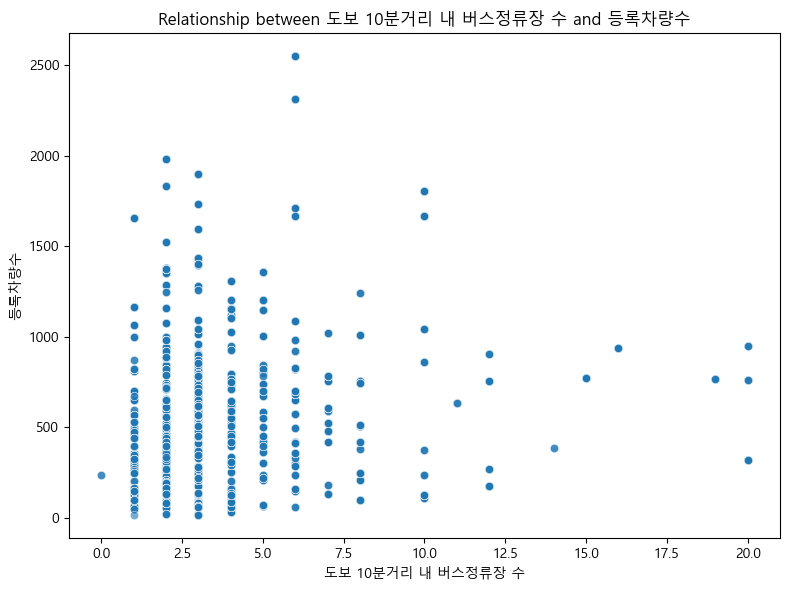

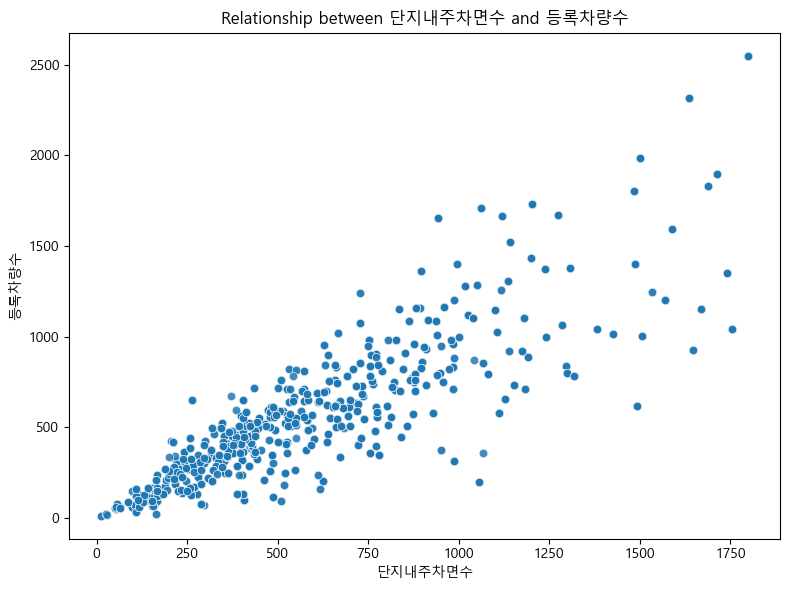

In [125]:
# Plotting relationships between numeric variables and '등록차량수'
for col in numeric_cols.drop('등록차량수'):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=train, x=col, y='등록차량수', alpha=0.6)
    plt.title(f'Relationship between {col} and 등록차량수')
    plt.tight_layout()
    plt.show()

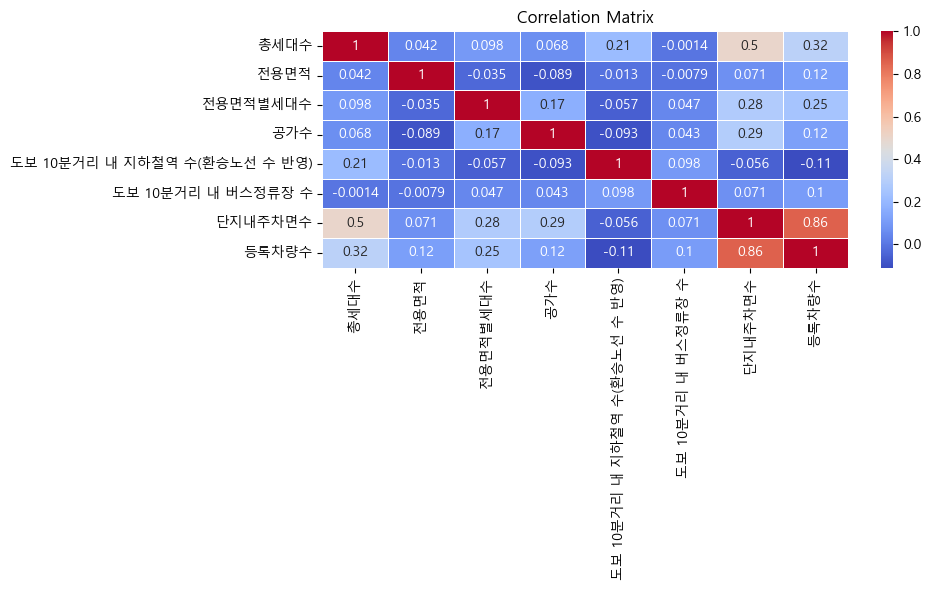

In [126]:
# Creating a correlation matrix
correlation_matrix = train[numeric_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

#등록차량수 -> 단지내주차면수와 높은 상관관계

2. 데이터 전처리

In [211]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [212]:
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

중복데이터 제거

In [214]:
train = train.drop_duplicates()
test = test.drop_duplicates()

변수명 바꾸기

In [215]:
train.rename(columns={'도보 10분거리 내 지하철역 수(환승노선 수 반영)': '지하철'}, inplace=True)
train.rename(columns={'도보 10분거리 내 버스정류장 수': '버스'}, inplace=True)
test.rename(columns={'도보 10분거리 내 지하철역 수(환승노선 수 반영)': '지하철'}, inplace=True)
test.rename(columns={'도보 10분거리 내 버스정류장 수': '버스'}, inplace=True)

지하철, 버스 결측값 0으로 채우기

In [216]:
train['지하철'] = train['지하철'].fillna(0)
train['버스'] = train['버스'].fillna(0)

test['지하철'] = test['지하철'].fillna(0)

'-' 인 데이터 0으로 바꾸기

In [217]:
train['임대보증금'] = train['임대보증금'].replace('-', 0).astype('float64')
train['임대료'] = train['임대료'].replace('-', 0).astype('float64')
test['임대보증금'] = test['임대보증금'].replace('-', 0).astype('float64')
test['임대료'] = test['임대료'].replace('-', 0).astype('float64')

상가 데이터의 임대보증금, 임대료 0으로 바꾸기

In [218]:
train.loc[(train['임대건물구분'] == '상가') & (train['임대보증금'].isnull()), '임대보증금'] = 0
train.loc[(train['임대건물구분'] == '상가') & (train['임대료'].isnull()), '임대료'] = 0
test.loc[(test['임대건물구분'] == '상가') & (test['임대보증금'].isnull()), '임대보증금'] = 0
test.loc[(test['임대건물구분'] == '상가') & (test['임대료'].isnull()), '임대료'] = 0

나머지 임대보증금, 임대료 -> 공급유형 데이터만 남아서 0으로 처리

In [219]:
train['임대료'] = train['임대료'].fillna(0)
train['임대보증금'] = train['임대보증금'].fillna(0)

test['임대료'] = test['임대료'].fillna(0)
test['임대보증금'] = test['임대보증금'].fillna(0)

test 데이터에서 자격유형 2개가 비었는데 같은 단지코드에서의 자격유형을 통해 채울 수 있음

In [220]:
test.loc[(test.단지코드=='C2411')&(test.자격유형.isnull()), '자격유형'] = 'A'
test.loc[(test.단지코드=='C2253')&(test.자격유형.isnull()), '자격유형'] = 'C'

지역 변수 n지역으로 재생성
기준은 등록차량수의 중앙값을 기준으로 비슷한 지역끼리 묶기

In [221]:
import plotly.express as px
import numpy as np

area_groups = pd.DataFrame([
    *pd.DataFrame({
        '지역':train['지역'],
        '등록차량수':train['등록차량수'],
    })
    .groupby(['지역'])
    .apply(lambda x:{
        '지역':x.iloc[0,0],
        'count':len(x),
        'median':x.등록차량수.median()
    })
]).sort_values('median')

In [222]:
area_groups['cum_count'] = np.cumsum(area_groups['count'])
area_groups['n지역'] = pd.qcut(area_groups['cum_count'], 5, labels=False, retbins=False)

to_join = area_groups[['지역', 'n지역']].set_index('지역')
train = train.join(to_join, on='지역')
train['n지역'] = train['n지역'].astype('category')

test 데이터도 n지역 생성

In [223]:
test.insert(14, 'n지역','')
test.loc[(test['지역'] == '대전광역시') | (test['지역'] == '충청남도') | (test['지역'] == '부산광역시') | (test['지역'] == '제주특별자치도'), 'n지역'] = 0
test.loc[(test['지역'] == '강원도') | (test['지역'] == '경상남도') | (test['지역'] == '울산광역시'), 'n지역'] = 1
test.loc[(test['지역'] == '전라남도') | (test['지역'] == '전라북도') | (test['지역'] == '충청북도'), 'n지역'] = 2
test.loc[(test['지역'] == '경상북도') | (test['지역'] == '광주광역시') | (test['지역'] == '서울특별시'), 'n지역'] = 3
test.loc[(test['지역'] == '경기도') | (test['지역'] == '대구광역시') | (test['지역'] == '세종특별자치시'), 'n지역'] = 4

test['n지역'] = test['n지역'].astype('category')

공급유형 변수 n공급유형으로 변경
기준은 사회적 특성에 따른 분류후 묶기

In [224]:
train.loc[train['공급유형'].isin(['영구임대']),'공급유형'] = '영구임대'
train.loc[train['공급유형'].isin(['공공임대(5년)', '공공임대(10년)', '공공임대(50년)', '공공임대(분납)', '공공분양', '장기전세']),'공급유형'] = '공공'
train.loc[train['공급유형'].isin(['행복주택', '국민임대']), '공급유형'] = '국민'
train.loc[train['공급유형'].isin(['임대상가']),'공급유형'] = '임대상가'

test.loc[test['공급유형'].isin(['영구임대']),'공급유형'] = '영구임대'
test.loc[test['공급유형'].isin(['공공임대(5년)', '공공임대(10년)', '공공임대(50년)', '공공임대(분납)', '공공분양', '장기전세']),'공급유형'] = '공공'
test.loc[test['공급유형'].isin(['행복주택', '국민임대']), '공급유형'] = '국민'
test.loc[test['공급유형'].isin(['임대상가']),'공급유형'] = '임대상가'

train['n공급유형'] = train.loc[:,'공급유형'].astype('category').cat.codes
test['n공급유형'] = test.loc[:,'공급유형'].astype('category').cat.codes  

test,train 데이터를 df_train, df_test로 새로 만들건데 필요한 변수들만 가져가며 새로운 변수도 추가해서 만듦

단지코드를 기준으로 그룹핑 진행
이때 기존 데이터를 이용한 새로운 변수 5가지 생성
총임대세대수 : 같은 단지코드들의 전용면적별 세대수의 합

편귱전용면적 : 같은 단지코드들의 전용면적의 평균
총전용면적 : 같은 단지코드들의 각각의 전용면적을 각각의 전용면적별세대수를 곱한 값의 합

평균임대보증금 : 같은 단지코드들의 각각의 임대보증금을 각각의 세대수에 곱하여 단지코드의 세대수 합으로 나눔
평균임대보증금 : 같은 단지코드들의 각각의 임대료를 각각의 세대수에 곱하여 단지코드의 세대수 합으로 나눔


In [225]:
codes = test.단지코드.unique()  
areas = np.sort(test.전용면적.unique())

df_test = pd.DataFrame()
columns = ['단지코드', 'n지역', 'n공급유형', '공가수', '지하철', '버스', '단지내주차면수']

for i, code in enumerate(codes):
    tmp_code = test.loc[test.단지코드 == code].reset_index(drop=True)

    df_test.loc[i, columns] = tmp_code.loc[0, columns]
    df_test.loc[i, '총임대세대수'] = (tmp_code.전용면적별세대수).sum()

    df_test.loc[i, '평균전용면적'] = (tmp_code.전용면적).mean() 
    df_test.loc[i, '총전용면적'] = (tmp_code.전용면적 * tmp_code.전용면적별세대수).sum()
    df_test.loc[i, '평균임대보증금'] = (tmp_code.전용면적별세대수 * tmp_code.임대보증금).sum() / (tmp_code.전용면적별세대수).sum()
    df_test.loc[i, '평균임대료'] = (tmp_code.전용면적별세대수 * tmp_code.임대료).sum() / (tmp_code.전용면적별세대수).sum()

In [226]:
codes = train.단지코드.unique()
df_train = pd.DataFrame()
columns = ['단지코드', 'n지역', 'n공급유형', '공가수', '지하철', '버스', '단지내주차면수', '등록차량수']

for i, code in enumerate(codes):
    tmp_code = train.loc[train.단지코드 == code].reset_index(drop=True)

    df_train.loc[i, columns] = tmp_code.loc[0, columns]
    df_train.loc[i, '총임대세대수'] = (tmp_code.전용면적별세대수).sum()

    df_train.loc[i, '평균전용면적'] = (tmp_code.전용면적).mean() 
    df_train.loc[i, '총전용면적'] = (tmp_code.전용면적 * tmp_code.전용면적별세대수).sum()
    df_train.loc[i, '평균임대보증금'] = (tmp_code.전용면적별세대수 * tmp_code.임대보증금).sum() / (tmp_code.전용면적별세대수).sum()
    df_train.loc[i, '평균임대료'] = (tmp_code.전용면적별세대수 * tmp_code.임대료).sum() / (tmp_code.전용면적별세대수).sum()

차량보유인구비율 데이터 외부에서 가져옴

In [227]:
df_test['차량보유인구비율'] = df_test.apply(lambda row: 
    0.65723886 if row['n지역'] == 0 else
    0.65653728 if row['n지역'] == 1 else
    0.63224661 if row['n지역'] == 2 else
    0.67275740 if row['n지역'] == 3 else
    0.66739921 if row['n지역'] == 4 else None, axis=1)

In [228]:
df_train['차량보유인구비율'] = df_train.apply(lambda row: 
    0.65723886 if row['n지역'] == 0 else
    0.65653728 if row['n지역'] == 1 else
    0.63224661 if row['n지역'] == 2 else
    0.67275740 if row['n지역'] == 3 else
    0.66739921 if row['n지역'] == 4 else None, axis=1)

In [229]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      423 non-null    object 
 1   n지역       423 non-null    float64
 2   n공급유형     423 non-null    float64
 3   공가수       423 non-null    float64
 4   지하철       423 non-null    float64
 5   버스        423 non-null    float64
 6   단지내주차면수   423 non-null    float64
 7   등록차량수     423 non-null    float64
 8   총임대세대수    423 non-null    float64
 9   평균전용면적    423 non-null    float64
 10  총전용면적     423 non-null    float64
 11  평균임대보증금   423 non-null    float64
 12  평균임대료     423 non-null    float64
 13  차량보유인구비율  423 non-null    float64
dtypes: float64(13), object(1)
memory usage: 65.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      150 non-null    obj

In [101]:
df_test.to_csv('C:\\Users\\peter\\Desktop\\쿠글\\df_test2.csv', index=False, encoding='utf-8-sig')

In [102]:
df_train.to_csv('C:\\Users\\peter\\Desktop\\쿠글\\df_train2.csv', index=False, encoding='utf-8-sig')

3.모델링 진행

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF 모듈
import statsmodels.api as sm #쿡의 거리 위한 모듈
from statsmodels.stats.stattools import durbin_watson #더빈-왓슨,
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso #릿지, 라쏘
%matplotlib inline


각 feature와 target 변수 사이의 관계가 선형인지 비선형인지 확인

# Using Seaborn to plot scatter and residual plots for each feature against '등록차량수'
features = df_train.drop(columns=['단지코드', '등록차량수'])

for col in features:
    if df_train[col].dtype in ['float64', 'int64']:
        # Scatter plot
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.scatterplot(data=df_train, x=col, y='등록차량수', alpha=0.5)
        plt.title(f'Scatter plot of {col} vs. 등록차량수')

        # Residual plot
        plt.subplot(1, 2, 2)
        sns.residplot(data=df_train, x=col, y='등록차량수', scatter_kws={'alpha': 0.5})
        plt.title(f'Residual plot of {col} vs. 등록차량수')

        plt.tight_layout()
        plt.show()

총세대수, 단지내주차면수, 총전용면적 및 차량보유세대수와 같은 특성들은 '등록차량수'와 강한 선형 관계를 보입니다
다른 패턴들은 비선형적인 패턴을 보일 수 있습니다

만약 비선형인 경우, 적절한 변환 (예: 로그변환)을 통해 선형성을 가질 수있도록 변경하세요

In [231]:
# Filter out numeric features
numeric_features = df_train.select_dtypes(include=['float64', 'int64']).columns.drop('등록차량수')


＃
# Filter out numeric features
numeric_features = df_train.select_dtypes(include=['float64', 'int64']).columns.drop('등록차량수')

# Identify features that have only positive values for log transformation
positive_value_features = [col for col in numeric_features if (df_train[col] > 0).all()]

# Apply log transformation to features with only positive values
for col in positive_value_features:
    df_train[f'log_{col}'] = np.log(df_train[col] + 1)  # +1 to avoid log(0)
    df_test[f'log_{col}'] = np.log(df_test[col] + 1)  # Applying the same transformation to the test data

# Displaying the residual plots for the transformed features
for col in [f'log_{col}' for col in positive_value_features]:
    plt.figure(figsize=(6, 5))
    sns.residplot(data=df_train, x=col, y='등록차량수', scatter_kws={'alpha': 0.5})
    plt.title(f'Residual plot of {col} vs. 등록차량수')
    plt.tight_layout()
    plt.show()
＃

In [232]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      150 non-null    object 
 1   n지역       150 non-null    float64
 2   n공급유형     150 non-null    float64
 3   공가수       150 non-null    float64
 4   지하철       150 non-null    float64
 5   버스        150 non-null    float64
 6   단지내주차면수   150 non-null    float64
 7   총임대세대수    150 non-null    float64
 8   평균전용면적    150 non-null    float64
 9   총전용면적     150 non-null    float64
 10  평균임대보증금   150 non-null    float64
 11  평균임대료     150 non-null    float64
 12  차량보유인구비율  150 non-null    float64
dtypes: float64(12), object(1)
memory usage: 20.5+ KB


Scikit-learn 라이브러리를 사용하여 선형회귀모델을 학습시켜 보세요

In [233]:
X_train = df_train.drop(columns=['단지코드', '등록차량수'])
y_train = df_train['등록차량수']

In [234]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

n공급유형, n지역 원핫 인코딩

In [235]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


# Update the lists of numeric and categorical features
numeric_features = [col for col in numeric_features if col not in ['n지역', 'n공급유형']]
categorical_features = ['n지역', 'n공급유형']

# Redefine the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

preprocessor


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['공가수', '지하철', '버스', '단지내주차면수', '총임대세대수',
                                  '평균전용면적', '총전용면적', '평균임대보증금', '평균임대료',
                                  '차량보유인구비율']),
                                ('cat', OneHotEncoder(), ['n지역', 'n공급유형'])])

In [236]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Extracting features and target from train data
X_train_full = df_train.drop(columns=['단지코드', '등록차량수'])
y_train_full = df_train['등록차량수']
X_test_full = df_test.drop(columns=['단지코드'])

# Splitting the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Creating a pipeline with preprocessing and linear regression model
pipeline_full = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Training the linear regression model
pipeline_full.fit(X_train, y_train)

# Predicting on validation set
y_val_pred = pipeline_full.predict(X_val)

# Calculating RMSE for validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

rmse_val


186.44666988597066

선형회귀, 리지회귀,라쏘회귀 모두 학습시킨후 최적의 모델 선택

In [238]:
# Re-train Ridge Regression
pipeline_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
pipeline_ridge.fit(X_train, y_train)
y_val_pred_ridge = pipeline_ridge.predict(X_val)
rmse_val_ridge = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge))

# Re-train Lasso Regression
pipeline_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])
pipeline_lasso.fit(X_train, y_train)
y_val_pred_lasso = pipeline_lasso.predict(X_val)
rmse_val_lasso = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))

# Dictionary to store RMSE values for each model
rmse_values = {
    'Linear Regression': rmse_val,
    'Ridge Regression': rmse_val_ridge,
    'Lasso Regression': rmse_val_lasso
}

# Find the model with the lowest RMSE
best_model = min(rmse_values, key=rmse_values.get)

best_model, rmse_values[best_model]


('Linear Regression', 186.44666988597066)

In [239]:
submission_df = pd.DataFrame({
    '단지코드': df_test['단지코드'],
    '등록차량수_예측': y_test_pred
})
print(submission_df)

      단지코드     등록차량수_예측
0    C1072   705.825740
1    C1128  1242.877994
2    C1456   555.163946
3    C1840   506.491308
4    C1332  1134.651516
..     ...          ...
145  C2456   203.533616
146  C1266   361.222060
147  C2152   -50.661590
148  C1267   257.355214
149  C2189    74.926496

[150 rows x 2 columns]


회귀진단

잔차분석

잔차에 대한 히스토그램과 qqplot을 그려보세요

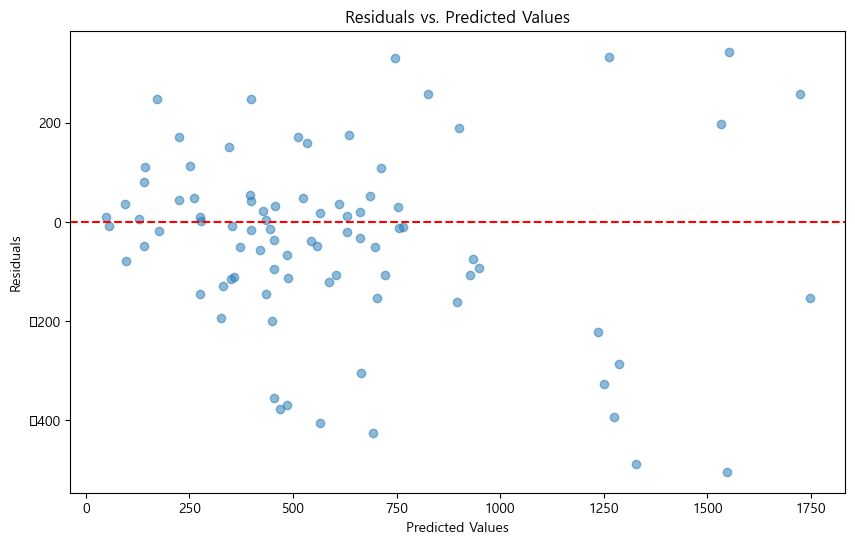

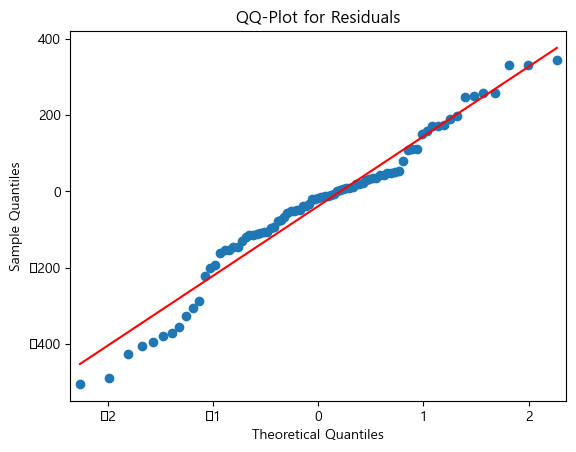

In [205]:
# Recalculate residuals
residuals = y_val - y_val_pred

# 1. Residuals vs. Predicted Values
plt.figure(figsize=(10,6))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 2. QQ-Plot for residuals
sm.qqplot(residuals, line='s')
plt.title('QQ-Plot for Residuals')
plt.show()



잔차와 예측값 사이의 관계를 살펴보기 위해 scatter plot 그려보세요

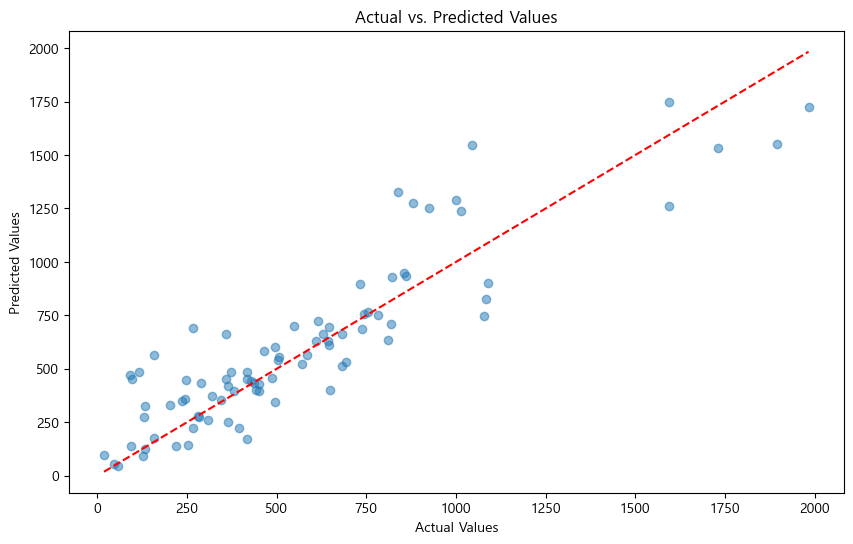

In [206]:
plt.figure(figsize=(10,6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')  # perfect prediction line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


이상치 탐지 

Cook's Distance 등 이상치 탐지 방법들을 활용하여 이상치를 찾아내고 해당 관측치가 모델에 어떤 영향을 미치는지 분석해 보세요

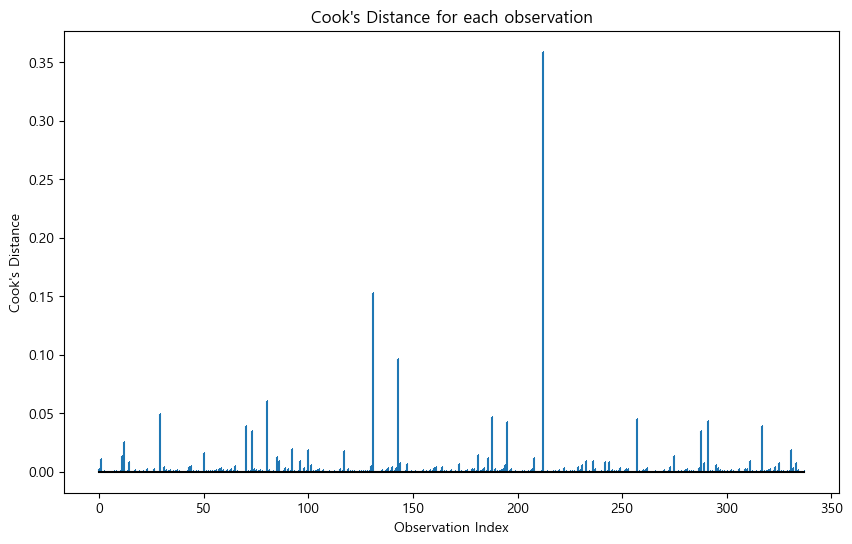

array([2.65419206e-03, 1.05157291e-02, 6.50983520e-04, 1.87564846e-05,
       9.25898030e-05, 9.29515008e-06, 2.59567903e-05, 2.69860017e-04,
       9.68400570e-04, 9.71237252e-05, 2.12739576e-04, 1.34741191e-02,
       2.51597446e-02, 7.32035745e-04, 8.28944056e-03, 1.43970925e-04,
       6.63873422e-05, 1.38220287e-03, 2.26386987e-06, 9.14363203e-04,
       2.16916891e-05, 5.12704265e-04, 1.30859924e-05, 2.01210401e-03,
       1.65323966e-04, 6.84146432e-05, 2.23600196e-03, 8.16360228e-07,
       1.81511136e-05, 4.93620490e-02, 2.04482970e-05, 3.65059227e-03,
       1.89014254e-03, 8.83032500e-04, 1.15830301e-03, 1.01489279e-03,
       4.13963538e-04, 1.15837557e-03, 4.99731527e-04, 9.54702636e-05,
       6.75928036e-06, 7.00772453e-05, 8.15334652e-04, 4.26920327e-03,
       5.28016705e-03, 2.92581729e-04, 5.53947931e-04, 4.63343660e-04,
       1.89616983e-04, 1.07048801e-04, 1.60609718e-02, 3.60343063e-04,
       2.18225852e-04, 4.88436532e-04, 3.69124075e-04, 6.84244781e-04,
      

In [207]:
import statsmodels.api as sm

# Add a constant to the predictors and fit the model
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

# Calculate Cook's Distance
influence = model.get_influence()
cooks_d, _ = influence.cooks_distance

# Plot Cook's Distance
plt.figure(figsize=(10,6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt="k-")
plt.title("Cook's Distance for each observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

cooks_d


그래프에서 볼 수 있듯이 대부분의 관측치는 낮은 Cook's Distance 값을 가지고 있습니다. 그러나 몇몇 관측치는 높은 값을 가지며, 이러한 관측치는 회귀 모델에 큰 영향을 미칠 수 있습니다.

일반적으로 Cook's Distance 값이 1보다 큰 관측치는 영향점으로 간주됩니다.

이제 영향점을 찾고 해당 관측치를 제거하여 모델의 영향을 분석해보겠습니다.

Cook's Distance 기준으로 볼 때, 값이 1을 초과하는 영향점은 없습니다. 따라서 우리 데이터에는 회귀 모델에 큰 영향을 미치는 관측치가 없는 것으로 판단됩니다.

하지만, Cook's Distance 값이 높은 (하지만 1보다는 작은) 관측치가 있다면, 그 관측치가 모델에 어느 정도 영향을 미치는지 조사해볼 수 있습니다.

Cook's Distance 값이 상위 1% 이내인 관측치를 살펴보겠습니다.

In [208]:
# Getting the threshold for top 1% of Cook's Distance
threshold = np.percentile(cooks_d, 99)

# Identifying points with Cook's Distance in the top 1%
high_cooks_d_points = np.where(cooks_d > threshold)[0]

# Print the indices of these points
high_cooks_d_points


array([ 80, 131, 143, 212], dtype=int64)

Cook's Distance 값이 상위 1%에 속하는 관측치의 인덱스는 80, 131, 143, 및 212입니다.

이제 이 관측치들을 제거하고 모델을 다시 학습시켜 예측 성능의 변화를 살펴보겠습니다.

In [210]:
# Removing the high Cook's Distance points from the data
X_train_no_influencers = X_train.drop(index=X_train.index[high_cooks_d_points])
y_train_no_influencers = y_train.drop(index=y_train.index[high_cooks_d_points])

# Training the linear regression model without the influential points
pipeline_no_influencers = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
pipeline_no_influencers.fit(X_train_no_influencers, y_train_no_influencers)

# Predicting on validation set
y_val_pred_no_influencers = pipeline_no_influencers.predict(X_val)

# Calculating RMSE for validation set
rmse_val_no_influencers = np.sqrt(mean_squared_error(y_val, y_val_pred_no_influencers))

rmse_val_no_influencers


180.59079344019523

In [211]:
# Comparing RMSE before and after removing influential points
rmse_difference = rmse_val - rmse_val_no_influencers
rmse_difference


5.855876445775436

영향점을 제거한 후, RMSE 값이 약 5.86만큼 감소하였습니다. 이는 영향점을 제거함으로써 모델의 예측 성능이 약간 개선되었음을 의미합니다.

Durbin-Watson 통계량 등으로 잔차의 독립성 검정하세요

In [212]:
# Calculating Durbin-Watson statistic
durbin_watson_stat = sm.stats.durbin_watson(residuals)
durbin_watson_stat


1.7552055584762578

이 값은 2 근처에 있으므로, 잔차가 독립적이라는 가정이 대체로 타당하다고 볼 수 있습니다. 그러나 완벽하게 2에 가깝지는 않으므로, 약간의 양의 자기상관이 존재할 수 있습니다.

시간에 따른 자기상관 문제는 시계열 데이터를 나타내는 변수 없기 때문에 확인하기 어렵다

다중공선성 진단 
VIF 등으로 다중공선성 문제 여부를 판단하고 다중공선성이 어떤 가정과 연관이 있는지 설명하세요

정규화 후 회귀

In [218]:

# 수치형 변수 정규화
scaler = StandardScaler()
features_to_scale = ["공가수", "지하철", "버스", "단지내주차면수", "총임대세대수", "평균전용면적", "총전용면적", "평균임대보증금", "평균임대료", "차량보유인구비율"]
df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

# 변환된 데이터 확인
df_train.head()


,단지코드,n지역,n공급유형,공가수,지하철,버스,단지내주차면수,등록차량수,총임대세대수,평균전용면적,총전용면적,평균임대보증금,평균임대료,차량보유인구비율,log_단지내주차면수,log_총임대세대수,log_평균전용면적,log_총전용면적,log_차량보유인구비율
0,C2483,3.0,1.0,2.363808,-0.317882,-0.246089,2.266365,1015.0,0.466897,0.327462,0.850061,0.088721,-0.086940,1.165609,7.262629,6.803505,3.929396,10.727814,0.514473
1,C2515,2.0,1.0,0.339347,-0.317882,-0.246089,0.085113,205.0,-0.412918,-0.139363,-0.510683,-0.580351,-0.554776,-1.716962,6.437752,6.302619,3.814316,9.996195,0.489957
2,C1407,1.0,1.0,-0.046264,2.318669,-0.959075,1.885123,1064.0,0.501594,-0.563050,0.251144,0.053220,-0.197344,0.011456,7.159292,6.818924,3.697003,10.468557,0.504729
3,C1945,4.0,1.0,-0.721085,2.318669,-0.246089,0.384661,730.0,-0.189867,0.563110,0.136446,-0.022109,0.122973,0.784343,6.599870,6.455199,3.982817,10.410207,0.511265
4,C1470,1.0,1.0,0.050139,-0.317882,-0.602582,0.142300,553.0,-0.038687,-0.254430,0.024611,-0.272189,-0.503029,0.011456,6.470800,6.546785,3.783792,10.349835,0.504729


In [225]:
# 데이터 재로드
df_train_original = pd.read_csv("/mnt/data/df_train2.csv")
df_test_original = pd.read_csv("/mnt/data/df_test2.csv")

# 원-핫 인코딩만 적용
train_encoded_original = ohe.fit_transform(df_train_original[["n지역", "n공급유형"]])
test_encoded_original = ohe.transform(df_test_original[["n지역", "n공급유형"]])

# 원-핫 인코딩된 데이터를 DataFrame으로 변환
df_train_encoded_original = pd.DataFrame(train_encoded_original, columns=ohe.get_feature_names_out(["n지역", "n공급유형"]))
df_test_encoded_original = pd.DataFrame(test_encoded_original, columns=ohe.get_feature_names_out(["n지역", "n공급유형"]))

# 원래의 데이터에서 "n지역"과 "n공급유형"을 제거하고 원-핫 인코딩된 데이터를 추가
df_train_original = pd.concat([df_train_original.drop(["n지역", "n공급유형"], axis=1), df_train_encoded_original], axis=1)
df_test_original = pd.concat([df_test_original.drop(["n지역", "n공급유형"], axis=1), df_test_encoded_original], axis=1)

# 입력 변수와 목표 변수 분리
X_train_original = df_train_original.drop(["단지코드", "등록차량수"], axis=1)
y_train_original = df_train_original["등록차량수"]

# 각 모델에 대한 RMSE 계산
scores_original = {}
for name, model in models.items():
    score = -cross_val_score(model, X_train_original, y_train_original, cv=5, scoring='neg_mean_squared_error')
    scores_original[name] = np.sqrt(score.mean())

scores_original


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/df_train2.csv'

In [220]:
# 입력 변수와 목표 변수 분리
X_train = df_train.drop(["단지코드", "등록차량수"], axis=1)
y_train = df_train["등록차량수"]

X_test = df_test.drop(["단지코드"], axis=1)  # 테스트 데이터에는 "등록차량수" 컬럼이 없을 수 있습니다.

X_train.shape, y_train.shape, X_test.shape


((423, 17), (423,), (150, 17))

In [223]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# 모델 초기화
models = {
    "Linear": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}

# 각 모델에 대한 RMSE 계산
scores = {}
for name, model in models.items():
    score = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores[name] = np.sqrt(score.mean())

scores


{'Linear': 190.3440179290263,
 'Lasso': 192.51017491991865,
 'Ridge': 192.07448012843}

In [82]:
import statsmodels.api as sm

# 선형 회귀 모델을 statsmodels로 학습
X_train_with_const = sm.add_constant(X_train_original)  # 상수항 추가
model = sm.OLS(y_train_original, X_train_with_const).fit()

# Cook's Distance 계산
influence = model.get_influence()
cooks_d, pvals = influence.cooks_distance

# 높은 Cook's Distance를 가진 관측치 식별 (예: 4/(n-k-1) 보다 큰 값들)
high_cooks_d_points = np.where(cooks_d > 4 / (len(y_train_original) - len(X_train_original.columns) - 1))[0]

# 영향력 있는 관측치 제거
X_train_no_influencers = X_train_original.drop(index=high_cooks_d_points)
y_train_no_influencers = y_train_original.drop(index=high_cooks_d_points)

# 선형 회귀 모델 재학습
model_no_influencers = LinearRegression().fit(X_train_no_influencers, y_train_no_influencers)

# R-제곱 값 계산
r2_no_influencers = model_no_influencers.score(X_train_no_influencers, y_train_no_influencers)

r2_no_influencers


NameError: name 'X_train_original' is not defined